# Selection of plotting wrt available data :
1. Categorical to Categorical :- Chi-Square / Pearson / Hypothesis
2. Categorical to Numerical :- Bar / Pie / Line / Catplot
3. Numerical to Numerical :- Co-Relation / Histogram / Scaatter plot / Heatmap / Voilin plot / Box
4. Multivariable:- Anova plot




*** Warning :- In below statistical analysis two datasets are used for better visual results please check the dataset mentioned before checking the graphs. ***

# Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from tqdm import tqdm
import time

# Dataframe imported

* Importing two different dataset so every plot could be plotted properly. 
* There are some plots which are hard to plot of df.

In [2]:
df=pd.read_csv("../input/covid19-india-statewise/COVID_19_INDIA_Statewise.csv")
df_2=pd.read_csv("../input/family/galton.csv")

# Dataset checking and Cleaning

In [3]:
df.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  2580 non-null   object
 1   Time                  2580 non-null   object
 2   State/UnionTerritory  2580 non-null   object
 3   Confirmed             2580 non-null   int64 
 4   Cured                 2580 non-null   int64 
 5   Deaths                2580 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 121.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   family  898 non-null    object 
 1   father  898 non-null    float64
 2   mother  898 non-null    float64
 3   gender  898 non-null    object 
 4   height  898 non-null    float64
 5   kids    898 non-null    int64  
 6   male    898 non-null    int64  
 7   

In [4]:
df.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'Confirmed', 'Cured', 'Deaths'], dtype='object')

In [5]:
df_2.columns

Index(['family', 'father', 'mother', 'gender', 'height', 'kids', 'male',
       'female'],
      dtype='object')

In [6]:
df.describe()

,Confirmed,Cured,Deaths
count,2580.000000,2580.000000,2580.000000
mean,1024.926357,345.281008,31.887209
std,3696.862515,1188.481854,132.889888
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,37.000000,8.500000,1.000000
75%,474.750000,90.000000,7.000000
max,54758.000000,16954.000000,1792.000000


In [7]:
df_2.describe

<bound method NDFrame.describe of     family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4     1       0
1        1    78.5    67.0      F    69.2     4     0       1
2        1    78.5    67.0      F    69.0     4     0       1
3        1    78.5    67.0      F    69.0     4     0       1
4        2    75.5    66.5      M    73.5     4     1       0
..     ...     ...     ...    ...     ...   ...   ...     ...
893   136A    68.5    65.0      M    68.5     8     1       0
894   136A    68.5    65.0      M    67.7     8     1       0
895   136A    68.5    65.0      F    64.0     8     0       1
896   136A    68.5    65.0      F    63.5     8     0       1
897   136A    68.5    65.0      F    63.0     8     0       1

[898 rows x 8 columns]>

In [8]:
df.isnull()

,Date,Time,State/UnionTerritory,Confirmed,Cured,Deaths
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2575,False,False,False,False,False,False
2576,False,False,False,False,False,False
2577,False,False,False,False,False,False
2578,False,False,False,False,False,False


In [9]:
df_2.isnull()

,family,father,mother,gender,height,kids,male,female
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
893,False,False,False,False,False,False,False,False
894,False,False,False,False,False,False,False,False
895,False,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False,False


# Dataset Manipulation

In [10]:
df_state=df.groupby("State/UnionTerritory")
df_state.head(10)

,Date,Time,State/UnionTerritory,Confirmed,Cured,Deaths
0,26-05-2020,11:14 PM,Maharashtra,54758,16954,1792
1,26-05-2020,07:13 PM,Tamil Nadu,17728,9342,128
2,26-05-2020,10:14 PM,Gujarat,14829,7139,915
3,26-05-2020,02:42 PM,Delhi,14465,6954,288
4,26-05-2020,10:12 AM,Rajasthan,7645,4293,172
...,...,...,...,...,...,...
513,13-05-2020,7:19 AM,Daman and Diu,0,0,0
524,12-05-2020,7:19 AM,Daman and Diu,0,0,0
561,11-05-2020,7:19 AM,Daman and Diu,0,0,0
598,10-05-2020,7:19 AM,Daman and Diu,0,0,0


In [11]:
df_s=df_2.groupby("gender")
df_s.head()

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1,0
1,1,78.5,67.0,F,69.2,4,0,1
2,1,78.5,67.0,F,69.0,4,0,1
3,1,78.5,67.0,F,69.0,4,0,1
4,2,75.5,66.5,M,73.5,4,1,0
5,2,75.5,66.5,M,72.5,4,1,0
6,2,75.5,66.5,F,65.5,4,0,1
7,2,75.5,66.5,F,65.5,4,0,1
8,3,75.0,64.0,M,71.0,2,1,0
10,4,75.0,64.0,M,70.5,5,1,0


In [12]:
# df_confirmed=df.sort_values(by='Confirmed',ascending=False)
# df_con_15=df_confirmed.index[0:15]

df_c=df.nlargest(15, ['Confirmed'])
df_c

,Date,Time,State/UnionTerritory,Confirmed,Cured,Deaths
0,26-05-2020,11:14 PM,Maharashtra,54758,16954,1792
37,25-05-2020,9:24 AM,Maharashtra,52667,15786,1695
74,24-05-2020,10:25 PM,Maharashtra,50231,14600,1635
111,23-05-2020,8:53 PM,Maharashtra,47190,13404,1577
148,22-05-2020,8:53 PM,Maharashtra,47190,13404,1577
185,21-05-2020,11:09 PM,Maharashtra,41642,11726,1454
222,20-05-2020,8:05 AM,Maharashtra,39297,10318,1390
259,19-05-2020,11:12 PM,Maharashtra,37136,9639,1325
296,18-05-2020,11:19 PM,Maharashtra,35058,8437,1249
333,17-05-2020,11:26 PM,Maharashtra,33053,7688,1198


In [13]:
df_d=df.nlargest(15, ['Deaths'])
df_d

,Date,Time,State/UnionTerritory,Confirmed,Cured,Deaths
0,26-05-2020,11:14 PM,Maharashtra,54758,16954,1792
37,25-05-2020,9:24 AM,Maharashtra,52667,15786,1695
74,24-05-2020,10:25 PM,Maharashtra,50231,14600,1635
111,23-05-2020,8:53 PM,Maharashtra,47190,13404,1577
148,22-05-2020,8:53 PM,Maharashtra,47190,13404,1577
185,21-05-2020,11:09 PM,Maharashtra,41642,11726,1454
222,20-05-2020,8:05 AM,Maharashtra,39297,10318,1390
259,19-05-2020,11:12 PM,Maharashtra,37136,9639,1325
296,18-05-2020,11:19 PM,Maharashtra,35058,8437,1249
333,17-05-2020,11:26 PM,Maharashtra,33053,7688,1198


In [14]:
df_cu=df.nlargest(15, ['Cured'])
df_cu

,Date,Time,State/UnionTerritory,Confirmed,Cured,Deaths
0,26-05-2020,11:14 PM,Maharashtra,54758,16954,1792
37,25-05-2020,9:24 AM,Maharashtra,52667,15786,1695
74,24-05-2020,10:25 PM,Maharashtra,50231,14600,1635
111,23-05-2020,8:53 PM,Maharashtra,47190,13404,1577
148,22-05-2020,8:53 PM,Maharashtra,47190,13404,1577
185,21-05-2020,11:09 PM,Maharashtra,41642,11726,1454
222,20-05-2020,8:05 AM,Maharashtra,39297,10318,1390
259,19-05-2020,11:12 PM,Maharashtra,37136,9639,1325
1,26-05-2020,07:13 PM,Tamil Nadu,17728,9342,128
38,25-05-2020,7:22 PM,Tamil Nadu,17082,8731,119


# Visualizing data
**In below visualisation we'll be solving every type of graph with two different libraries.(Pandas & Seaborn)**

# Bar Graph Plot 

Text(0.5, 1.0, 'No. of confirmed cases wrt State')

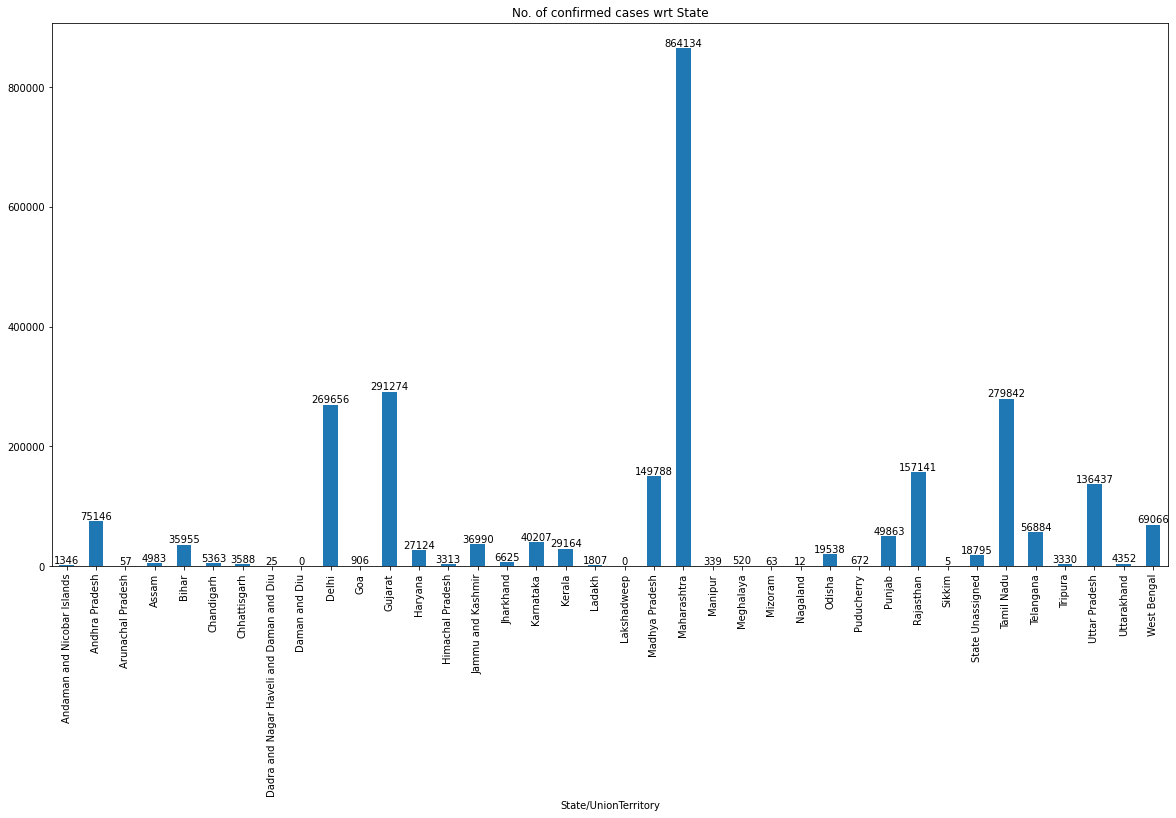

In [15]:
# Vertical Bar graph using Pandas library
fig = plt.figure(figsize=(20,10))
df_p=df.groupby(["State/UnionTerritory"]).sum()["Confirmed"].plot(kind='bar',rot=90)
df_p.bar_label(df_p.containers[0])
plt.title("No. of confirmed cases wrt State")


 * In above graph we can check no. of **confirmed cases wrt states**.as already the exact amount is aleady mentioned on the bar itself. 
 
 * **as graphs are more of the diagram which are self-explanatory**. and considering the above graph we can **clearly explain that Maharashtra has highest count of confirmed cases.**

* **df_p.bar_label(df_p.containers[0]) this is for labeling bar with the amount. containers is main fuction for the same.**

In [16]:
df_2.head

<bound method NDFrame.head of     family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4     1       0
1        1    78.5    67.0      F    69.2     4     0       1
2        1    78.5    67.0      F    69.0     4     0       1
3        1    78.5    67.0      F    69.0     4     0       1
4        2    75.5    66.5      M    73.5     4     1       0
..     ...     ...     ...    ...     ...   ...   ...     ...
893   136A    68.5    65.0      M    68.5     8     1       0
894   136A    68.5    65.0      M    67.7     8     1       0
895   136A    68.5    65.0      F    64.0     8     0       1
896   136A    68.5    65.0      F    63.5     8     0       1
897   136A    68.5    65.0      F    63.0     8     0       1

[898 rows x 8 columns]>

Text(0.5, 1.0, 'Average height of parents')

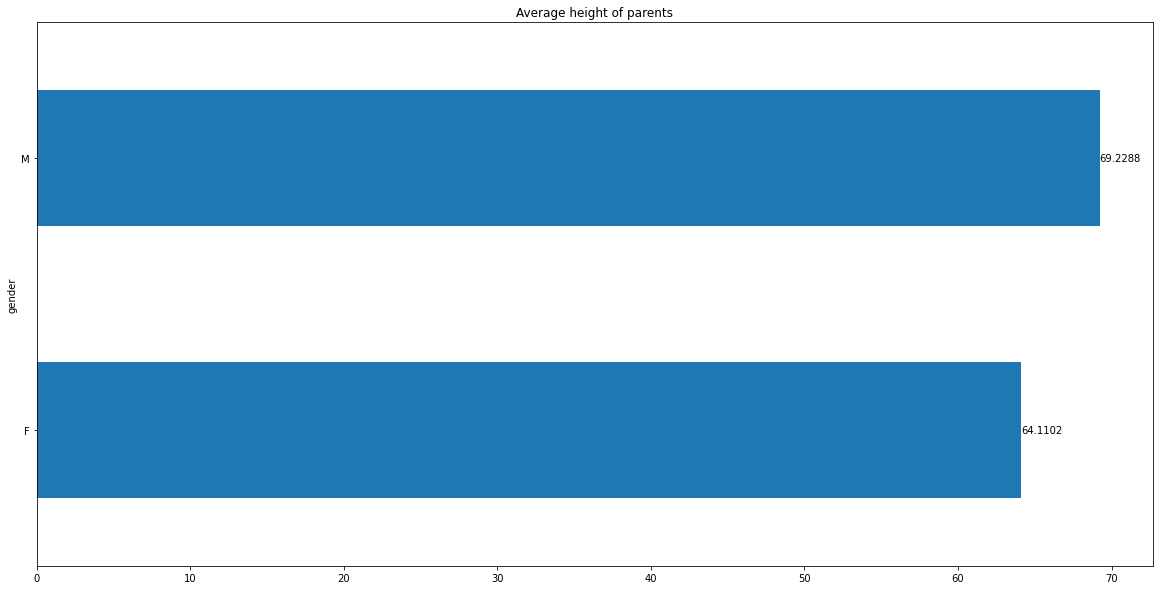

In [17]:
# Horizontal Bar graph using Pandas library
# fig = plt.figure(figsize=(20,10))
# df_p=df.groupby(["State/UnionTerritory"]).sum()["Confirmed"].plot(kind='barh',rot=0)
# df_p.bar_label(df_p.containers[0])
# plt.title("No. of confirmed cases wrt State")

# for Second Dataset
fig = plt.figure(figsize=(20,10))
df_p1=df_2.groupby(["gender"]).mean()["height"].plot(kind='barh',rot=0)
df_p1.bar_label(df_p1.containers[0])
plt.title("Average height of parents")

# df_p.hist()

 * As above graph is **drawn from second dataset** just for reference.
 
 * In above graph we can check **average height wrt gender**.as already the exact amount is already mentioned on the bar itself. 
 
 * As it's kind of obvious and **displays to have male heights average greater than female.**

 * df_p.bar_label(df_p.containers[0]) this is for labeling bar with the amount. containers is main fuction for the same.

[Text(0, 0, '54758'),
 Text(0, 0, '17728'),
 Text(0, 0, '14829'),
 Text(0, 0, '14465'),
 Text(0, 0, '7645'),
 Text(0, 0, '7024'),
 Text(0, 0, '6724'),
 Text(0, 0, '4009'),
 Text(0, 0, '2983'),
 Text(0, 0, '4013'),
 Text(0, 0, '2968'),
 Text(0, 0, '2283'),
 Text(0, 0, '2106'),
 Text(0, 0, '1991'),
 Text(0, 0, '1759')]

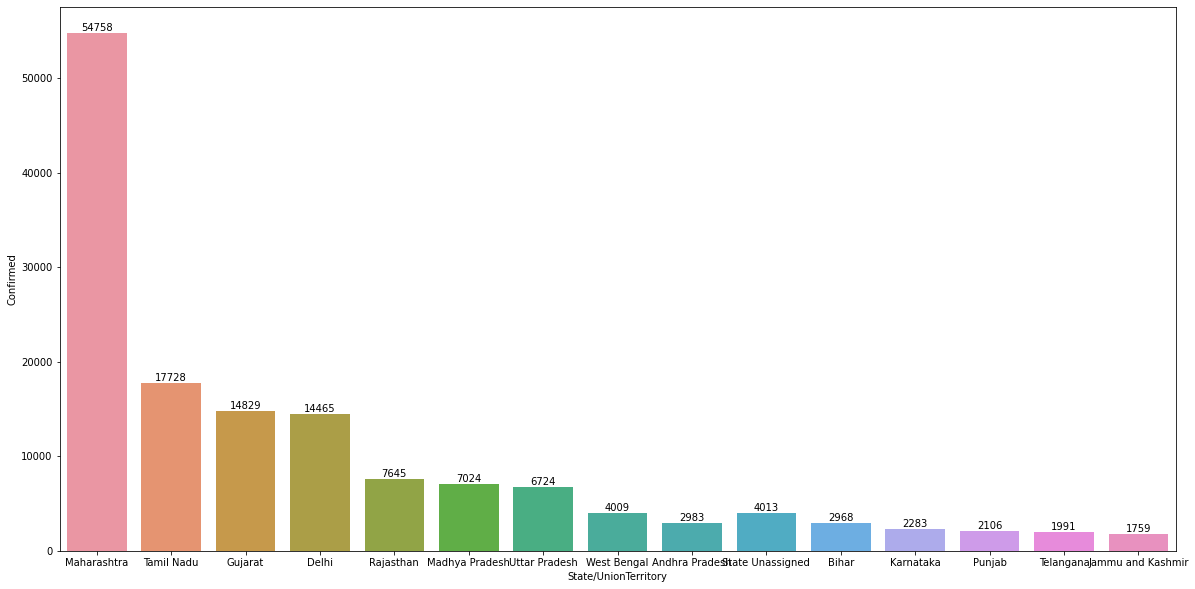

In [18]:
# Horizontal Bar graph using Seaborn library
fig = plt.figure(figsize=(20,10))
top_sold_Model=df.groupby('State/UnionTerritory').max()[['Confirmed']].sort_values(by='State/UnionTerritory',ascending = False).reset_index()
df_pp =sns.barplot(data = df.iloc[:15], y='Confirmed', x='State/UnionTerritory')
df_pp.bar_label(df_pp.containers[0])

* It's all same as of earlier shown graph with the same parameters the only difference in this is **Seaborn library is used** and the **values of the confirmed cases are sorted .** 
 
 * In above graph we can check no. of **confirmed cases wrt states**.as already the exact amount is aleady mentioned on the bar itself. 
 
 * **as graphs are more of the diagram which are self-explanatory**. and considering the above graph we can **clearly explain that Maharashtra has highest count of confirmed cases.**

* **df_p.bar_label(df_p.containers[0]) this is for labeling bar with the amount. containers is main fuction for the same.**

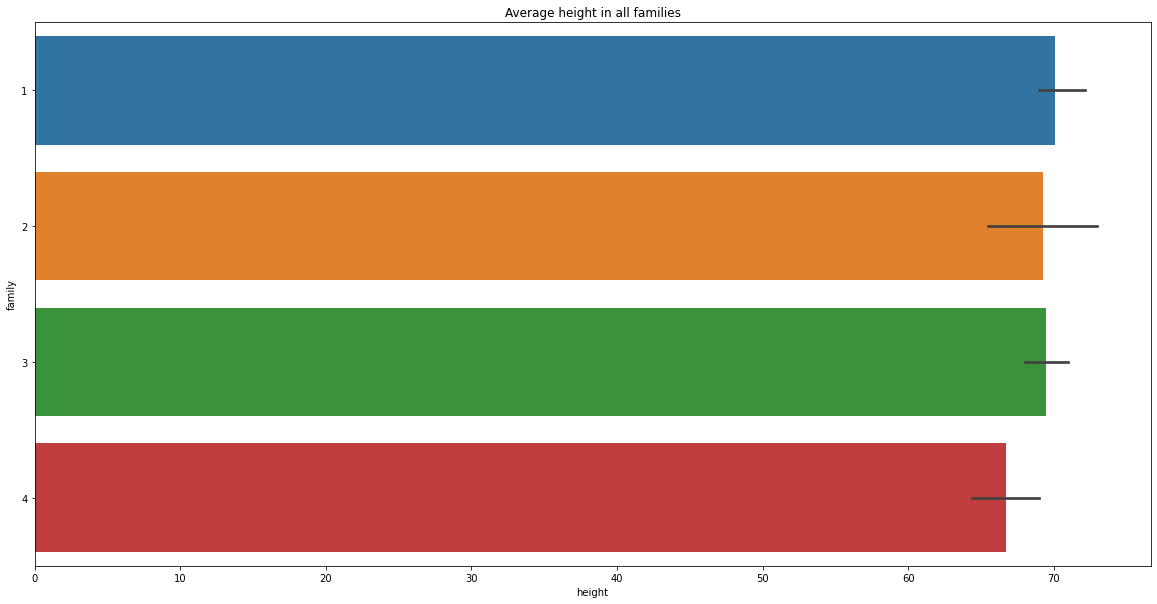

In [19]:
# Horizontal Bar graph using Seaborn library
# fig = plt.figure(figsize=(20,10))
# top_sold_Model=df.groupby('Confirmed').max()[['State/UnionTerritory']].sort_values(by='State/UnionTerritory',ascending = False).reset_index()
# df_pp =sns.barplot(data = df.iloc[:15], y='State/UnionTerritory', x='Confirmed',orient = 'h')
# df_pp.bar_label(df_pp.containers[0])

# for Second Dataset

fig = plt.figure(figsize=(20,10))
top_sol=df_2.groupby('family').mean()[['height']].sort_values(by='height',ascending = False).reset_index()
df_pp =sns.barplot(data = df_2.iloc[:15], y='family', x='height',orient = 'h').set(title='Average height in all families')
# df_pp.bar_label(df_pp.containers[0])

In [20]:
# df_stacks=df[["Cured","Deaths","Confirmed"]]
# df_stacks.plot(kind='bar', stacked=True,figsize=(40, 40))

# Pie Chart

Text(0.5, 1.0, 'Confirmed cases wrt States')

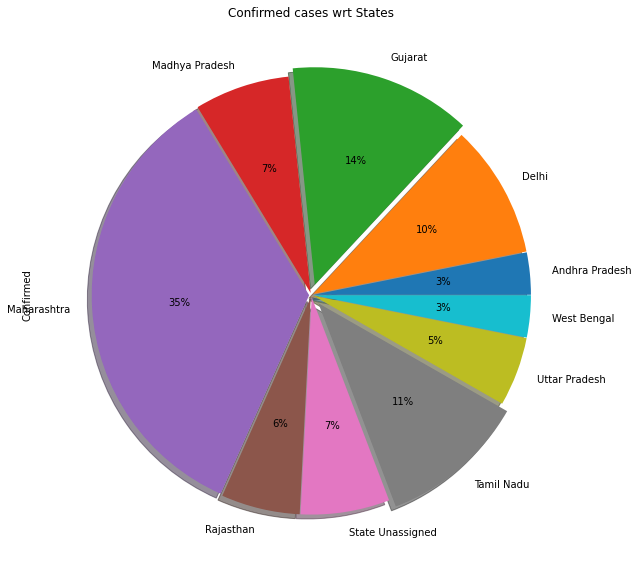

In [21]:
#Pie chart using Pandas
fig = plt.figure(figsize=(20,10))
df_t=df.groupby(['State/UnionTerritory']).agg({'Confirmed':np.mean})
df_t1=df_t.nlargest(10, ['Confirmed'])
df_t1.groupby(["State/UnionTerritory"]).sum()["Confirmed"].plot(kind='pie',rot=0,autopct='%1.0f%%',explode=[0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.05,0.01,0.01],shadow=True)
plt.title("Confirmed cases wrt States")


*** autopct for Automatic Percentage on slices.**

*** explode for moving slices with specified distance.**

* Need to collect highest 15 values in a dataframe for nicer Pie chart.

*** As per earlier representation on bar graph similarly the pie chart explains Maharashtra has the highest part in confirmed cases.**

Text(0.5, 1.0, 'Average Heights wrt Gender')

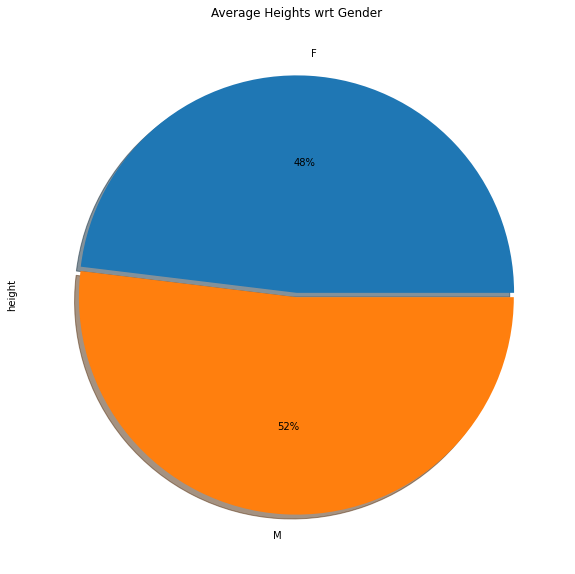

In [22]:
# for Second Dataset

fig = plt.figure(figsize=(20,10))
df_t3=df_2.groupby(['gender']).agg({'height':np.mean})
df_t4=df_t3.nlargest(10, ['height'])
df_t4.groupby(["gender"]).sum()["height"].plot(kind='pie',rot=0,autopct='%1.0f%%',shadow=True,explode=[0.01,0.01])
plt.title("Average Heights wrt Gender")

# Histogram

In [23]:
df.head()


,Date,Time,State/UnionTerritory,Confirmed,Cured,Deaths
0,26-05-2020,11:14 PM,Maharashtra,54758,16954,1792
1,26-05-2020,07:13 PM,Tamil Nadu,17728,9342,128
2,26-05-2020,10:14 PM,Gujarat,14829,7139,915
3,26-05-2020,02:42 PM,Delhi,14465,6954,288
4,26-05-2020,10:12 AM,Rajasthan,7645,4293,172


Text(0.5, 1.0, 'No. of deaths cases wrt State')

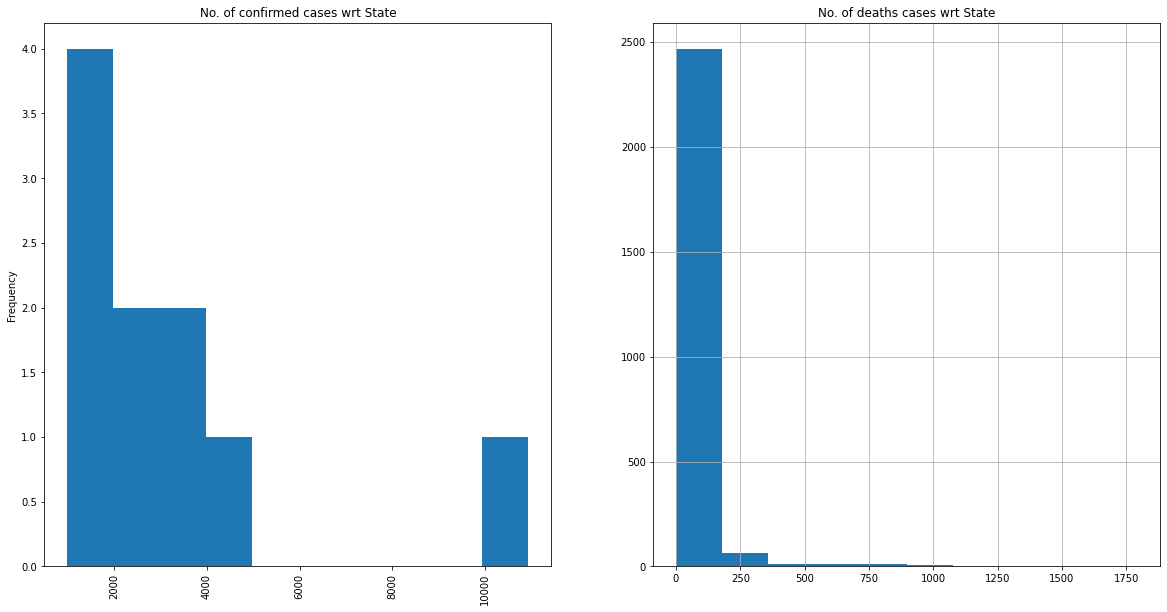

In [24]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
df_p=df_t1.groupby(["State/UnionTerritory"]).sum()["Confirmed"].plot(kind='hist',rot=90)
plt.title("No. of confirmed cases wrt State")

plt.subplot(1,2,2)
df['Deaths'].hist(bins=10)
plt.title("No. of deaths cases wrt State")

* **A histogram is an approximate representation of the distribution of numerical data.**

* If the bins are of equal size, a **bar is drawn over the bin with height proportional to the frequency**

* Bins need not be of equal width in that case,**the erected rectangle is defined to have its area proportional to the frequency of cases in the bin.**

* Above drawn both histograms **denotes the numerical data related to the states.**

* **and specifically plotted in subplot format. so, both can be examined at the same time.**

<AxesSubplot:xlabel='height', ylabel='Count'>

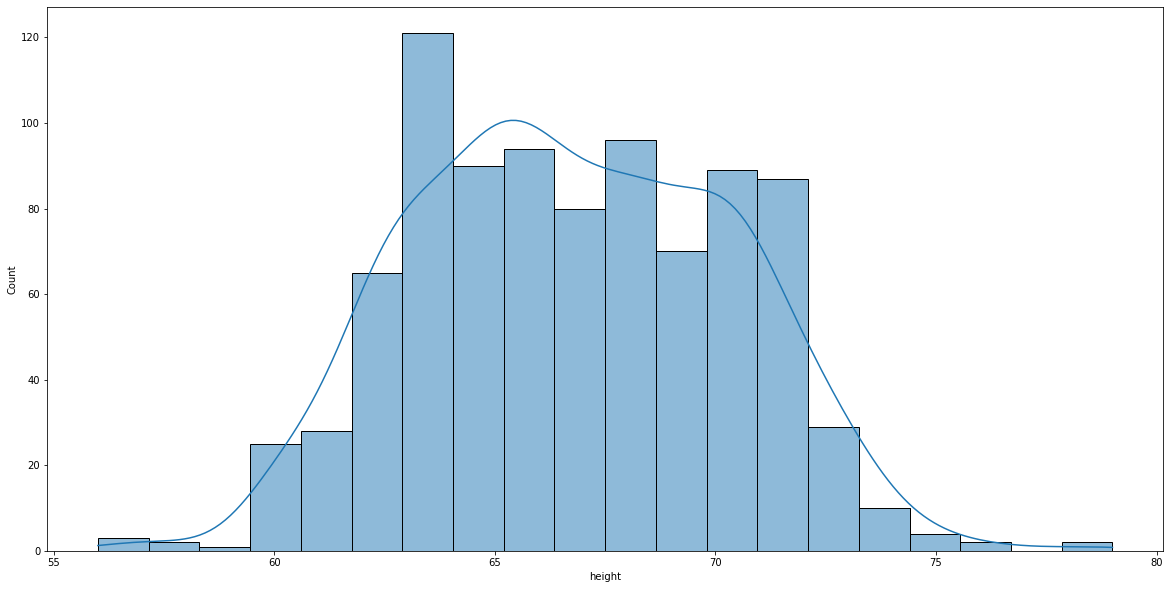

In [25]:
# fig = plt.figure(figsize=(20,10))
# sns.histplot(data = df, kde = True)

# for Second Dataset

fig = plt.figure(figsize=(20,10))
sns.histplot(data = df_2['height'], kde = True)

* **A histogram is an approximate representation of the distribution of numerical data.**

* If the bins are of equal size, a **bar is drawn over the bin with height proportional to the frequency**

* Bins need not be of **equal width in that case, the erected rectangle is defined to have its area proportional to the frequency of cases in the bin.**

* Above drawn both histograms **denotes the numerical data related to the average height in every family.**

* **and specifically plotted in subplot format. so, both can be examined at the same time.**

# Line Chart

In [26]:
df.head()

,Date,Time,State/UnionTerritory,Confirmed,Cured,Deaths
0,26-05-2020,11:14 PM,Maharashtra,54758,16954,1792
1,26-05-2020,07:13 PM,Tamil Nadu,17728,9342,128
2,26-05-2020,10:14 PM,Gujarat,14829,7139,915
3,26-05-2020,02:42 PM,Delhi,14465,6954,288
4,26-05-2020,10:12 AM,Rajasthan,7645,4293,172


In [27]:
df_2.head()

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1,0
1,1,78.5,67.0,F,69.2,4,0,1
2,1,78.5,67.0,F,69.0,4,0,1
3,1,78.5,67.0,F,69.0,4,0,1
4,2,75.5,66.5,M,73.5,4,1,0


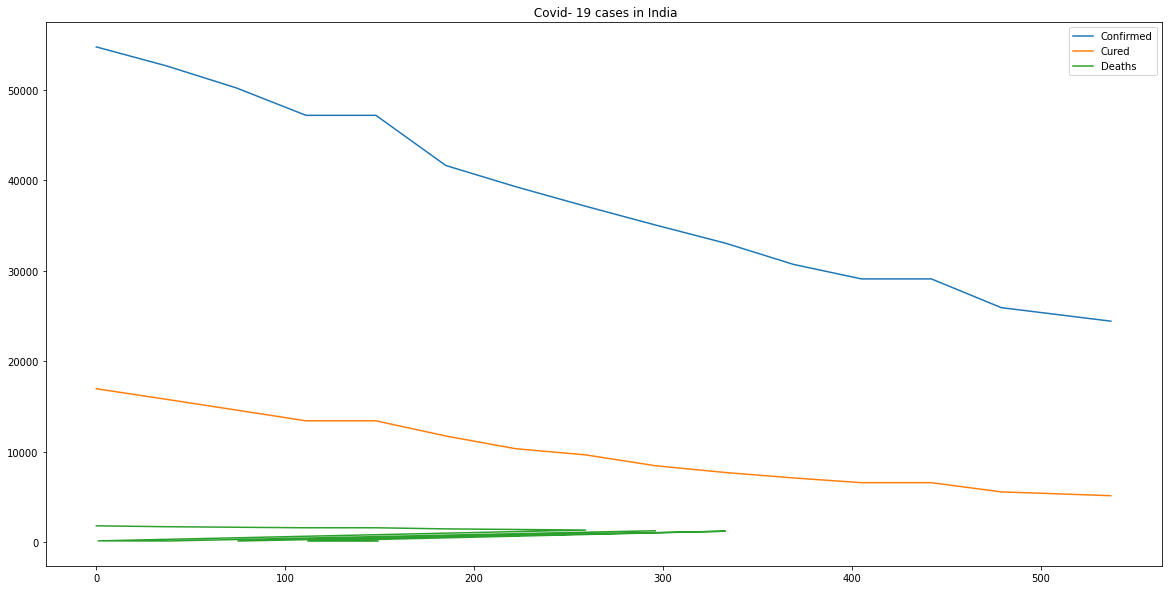

In [28]:
fig = plt.figure(figsize=(20,10))
plt.plot(df_c['Confirmed'])
plt.plot(df_d['Cured'])
plt.plot(df_cu['Deaths'])
plt.title(" Covid- 19 cases in India")
plt.gca().legend(('Confirmed','Cured','Deaths'))
plt.show()

* line chart is a type of chart which **displays information as a series of data points called 'markers' connected by straight line segments**.

* It is a basic type of chart common in many fields. **It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments.**

* A line chart is often **used to visualize a trend in data over intervals of time.**

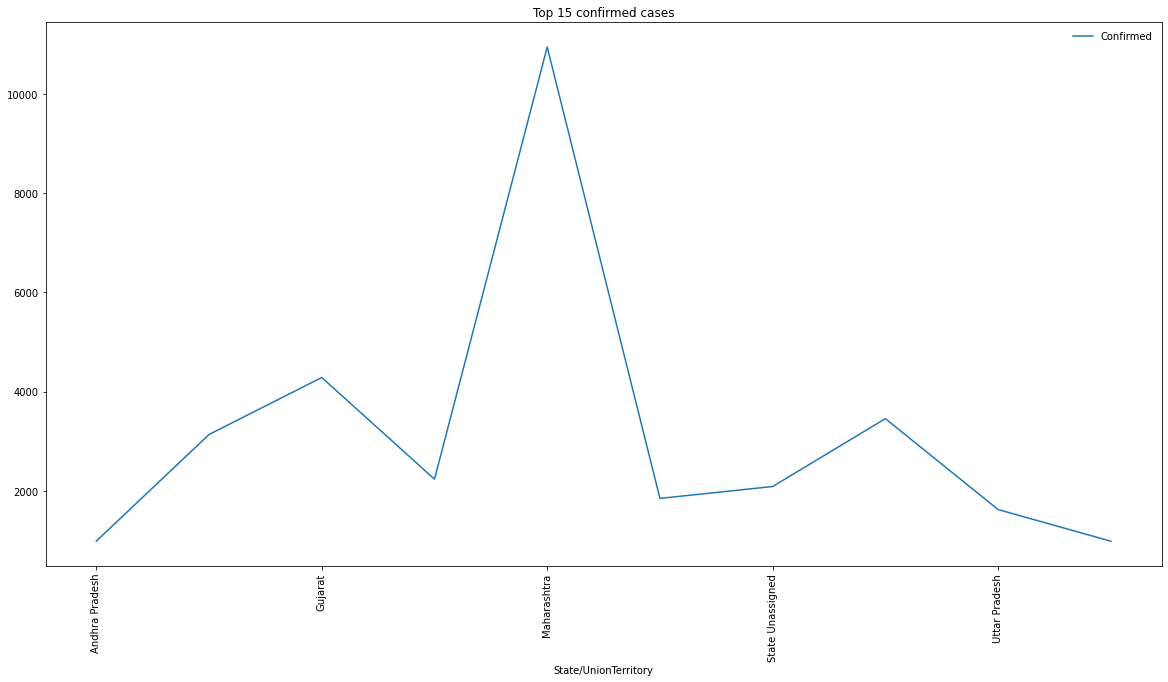

In [29]:
fig = plt.figure(figsize=(20,10))
df_t1.groupby(["State/UnionTerritory"]).max()["Confirmed"].plot(kind='line',rot=90)
plt.title("Top 15 confirmed cases")
plt.legend(loc='upper right', frameon=False)

* line chart is a type of chart which **displays information as a series of data points called 'markers' connected by straight line segments**.

* It is a basic type of chart common in many fields. **It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments.**

* A line chart is often **used to visualize a trend in data over intervals of time.**

# Scatter Plot

In [30]:
df.head()

,Date,Time,State/UnionTerritory,Confirmed,Cured,Deaths
0,26-05-2020,11:14 PM,Maharashtra,54758,16954,1792
1,26-05-2020,07:13 PM,Tamil Nadu,17728,9342,128
2,26-05-2020,10:14 PM,Gujarat,14829,7139,915
3,26-05-2020,02:42 PM,Delhi,14465,6954,288
4,26-05-2020,10:12 AM,Rajasthan,7645,4293,172


Text(0.5, 1.0, 'Confirmed caes wrt dates')

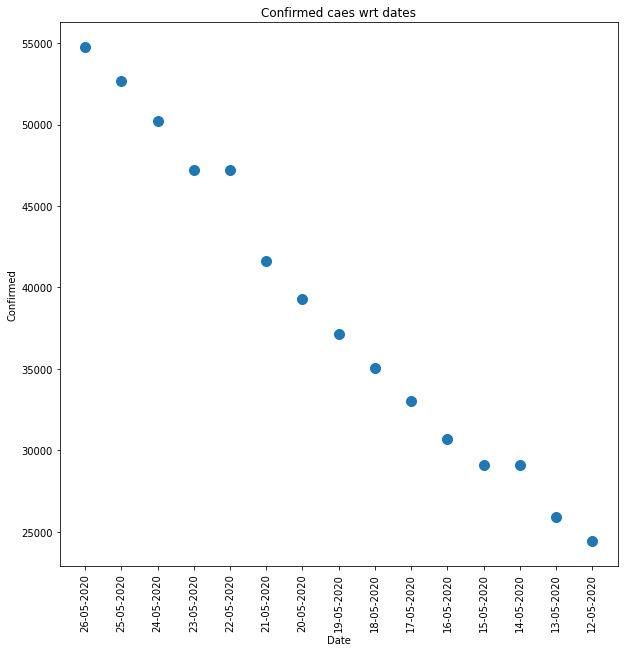

In [31]:
# for Second Dataset

df_c.plot.scatter(x = 'Date', y = 'Confirmed', s = 100,rot=90)
plt.gcf().set_size_inches((10, 10))  
plt.title('Confirmed caes wrt dates')

***scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.**

***If the points are coded (color/shape/size), one additional variable can be displayed.**

* In the above plotted scatter plot meant to **explain raise in confirmed cases wrt dates**. unfortunately i could not specify the date or the interval. working on it.

# Box plot

In [32]:
num_col=df.select_dtypes(exclude=[object])
num_col=num_col[1:]
num_col

,Confirmed,Cured,Deaths
1,17728,9342,128
2,14829,7139,915
3,14465,6954,288
4,7645,4293,172
5,7024,3689,305
...,...,...,...
2575,3,0,0
2576,3,0,0
2577,2,0,0
2578,1,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f08015bcc90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f08015c4350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f08015bc990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f08015c4950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f08015c4c90>],
 'means': []}

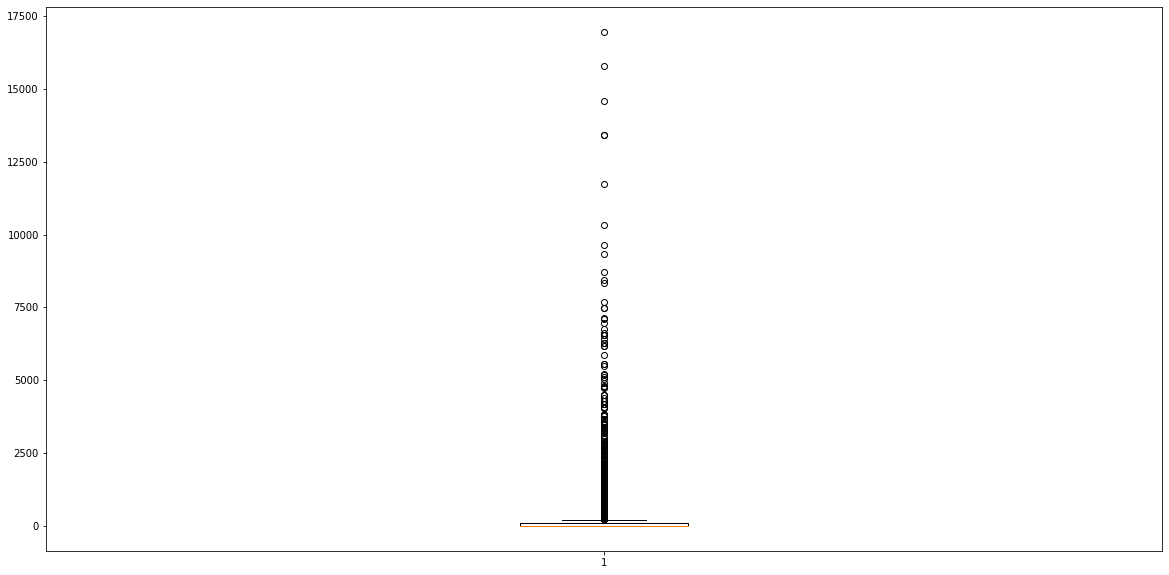

In [33]:
plt.figure(figsize=(20,10))
plt.boxplot(df["Cured"])

columns : Confirmed
columns : Cured
columns : Deaths


100%|██████████| 10/10 [00:20<00:00,  2.00s/it]


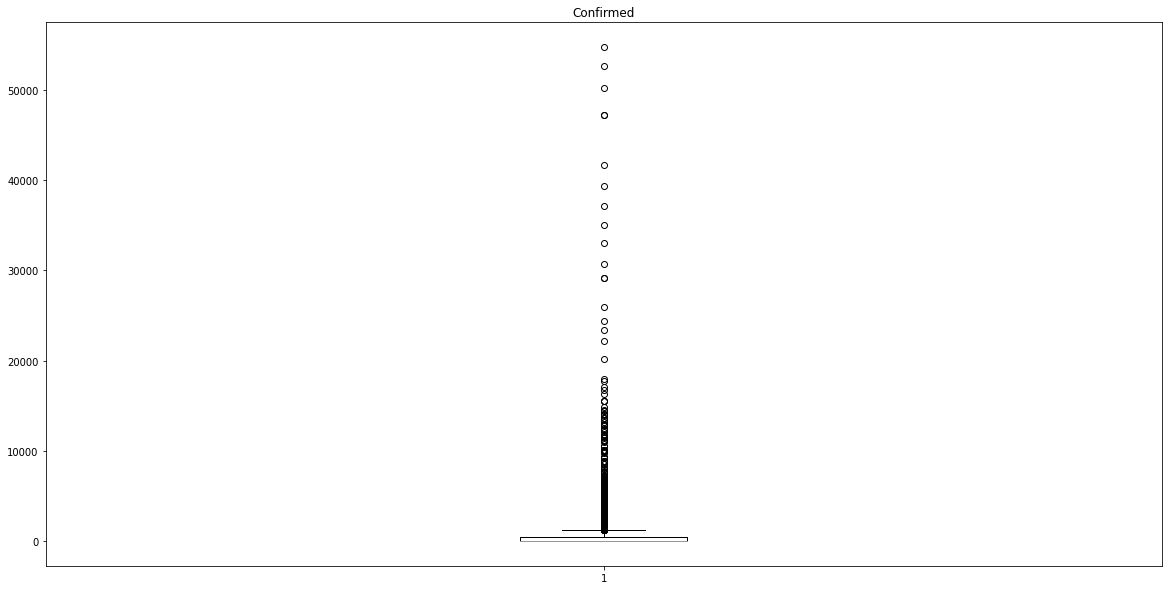

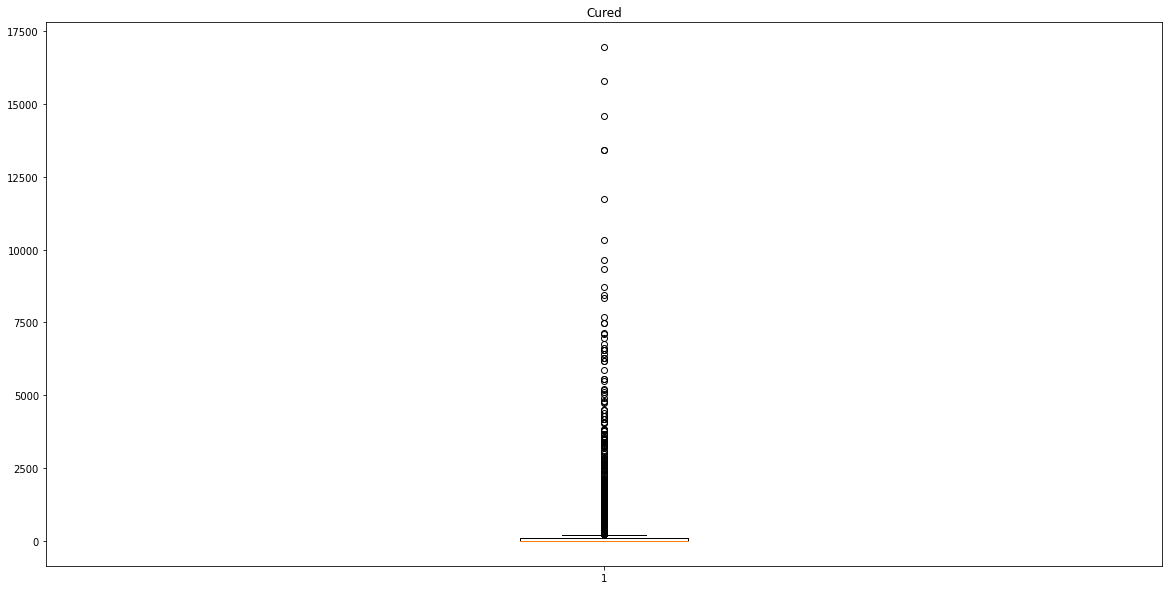

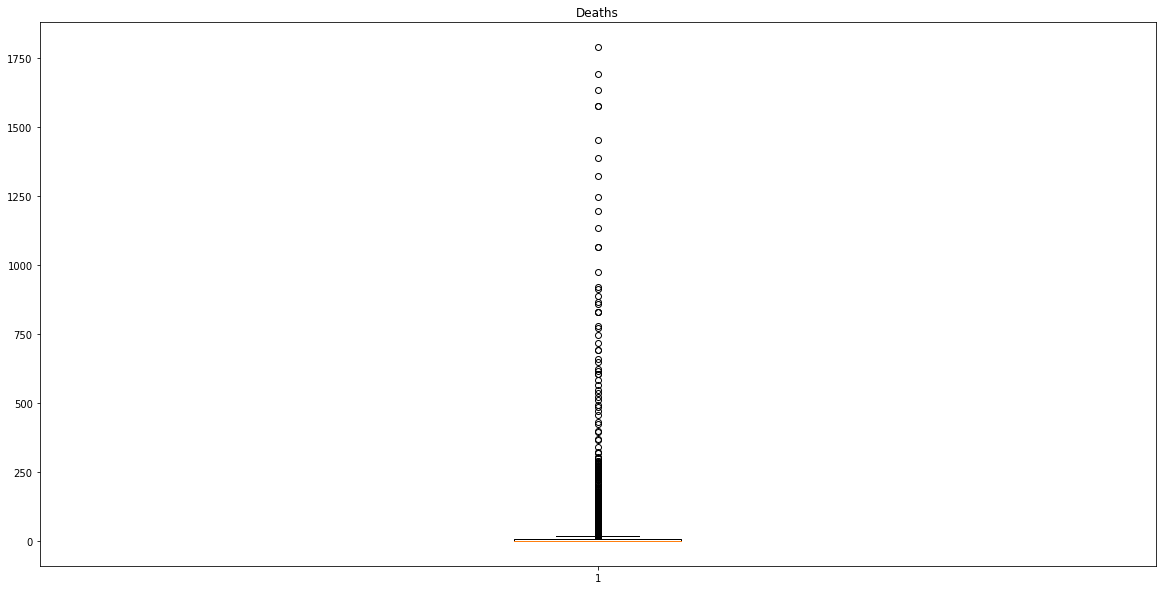

In [34]:
# for Second Dataset

for i in num_col:
    try:
        print("columns :",i)
        plt.figure(figsize=(20,10))
        plt.boxplot(df[i])
        plt.title(i)
    except:
        print("Ërror  in :", i)
        
for i in tqdm(range(10)):
  time.sleep(2)

*** is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.**

*** Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.**


# Heatmap

<AxesSubplot:>

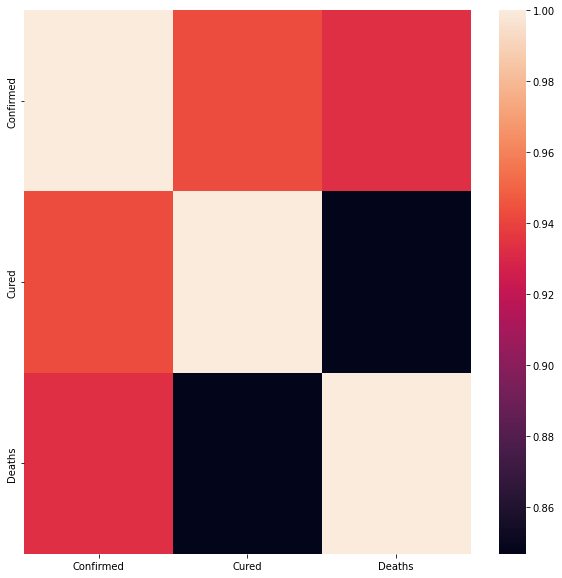

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

* The above heat map **explains the relation  between the cured case, deaths cases and confirmed cases the specified time period mentioned in dataset.**.

* Heat map is a data visualization **technique that shows magnitude of a phenomenon as color in two dimensions**.

* The **variation in color may be by hue or intensity**, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

* By contrast, the position of a magnitude in a spatial heat map is forced by the location of the magnitude in that space, **and there is no notion of cells; the phenomenon is considered to vary continuously.**

<AxesSubplot:>

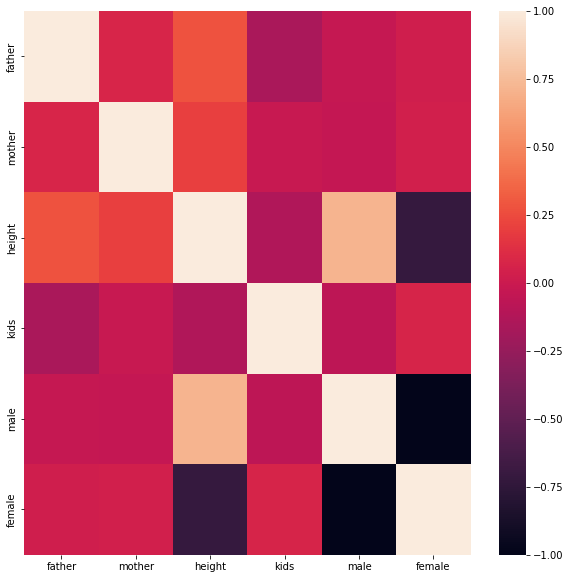

In [36]:
# for Second Dataset

plt.figure(figsize=(10,10))
sns.heatmap(df_2.corr())

* The above heat map **explains the relation  between the family meambes and their heights**.

* Heat map is a data visualization **technique that shows magnitude of a phenomenon as color in two dimensions**.

* The **variation in color may be by hue or intensity**, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

* By contrast, the position of a magnitude in a spatial heat map is forced by the location of the magnitude in that space, **and there is no notion of cells; the phenomenon is considered to vary continuously.**

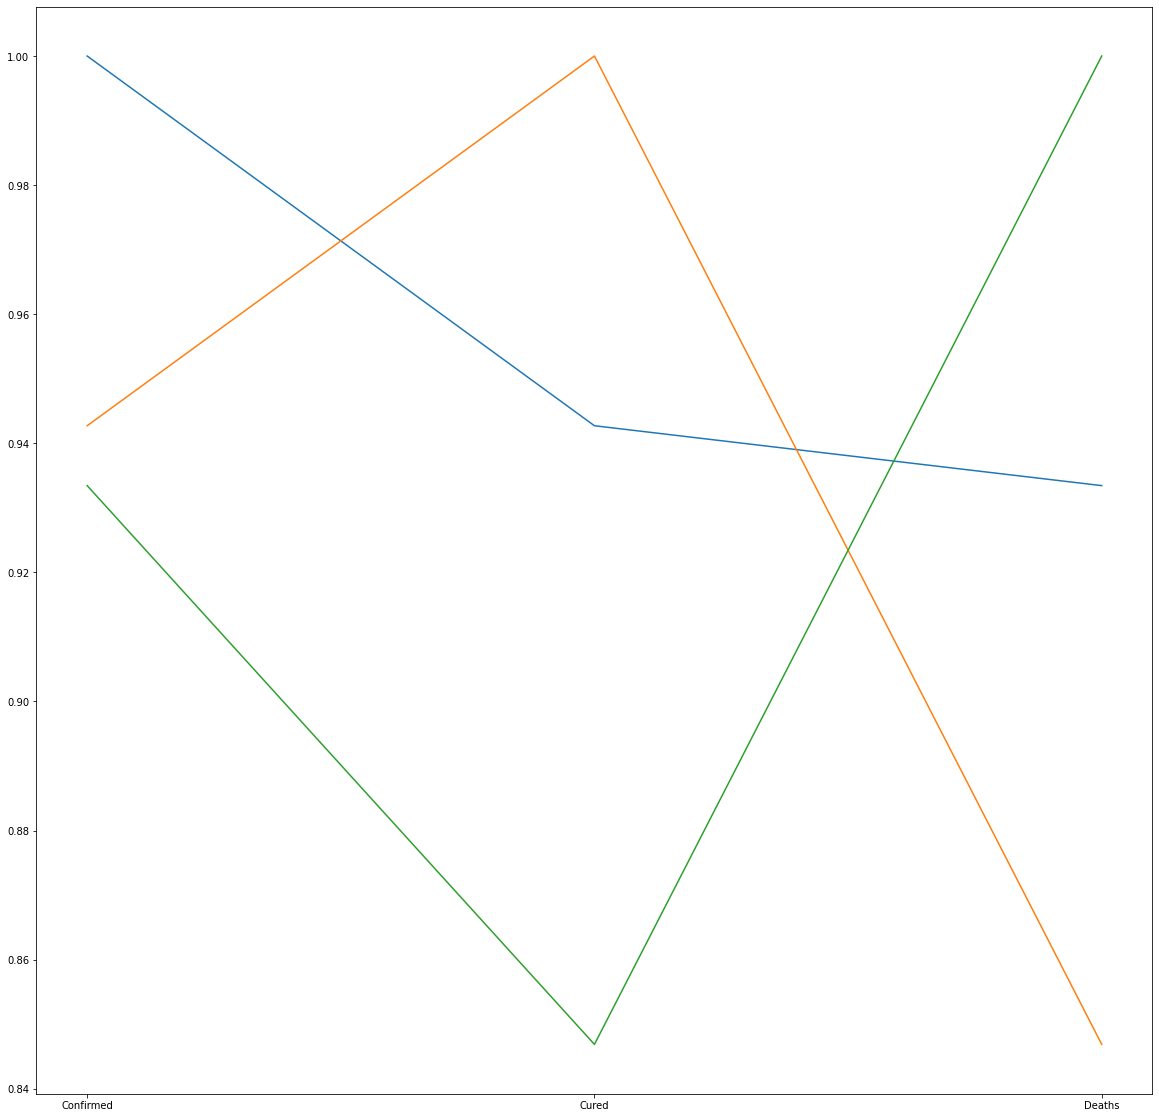

In [37]:
df.corr()
plt.figure(figsize=(20,20))
plt.plot(df.corr())

* Above plotted graph is **similar to heat map just the difference in heat map we use hue, Colour saturation to explain the strength of relations**. 

* it is as similar as the line graph as the scale on y-axis the strength of relation is denoted. 

# Sub Plots

**plt.subplot(1,3,2) (Row,Columns,Position)**

100%|██████████| 10/10 [00:20<00:00,  2.00s/it]


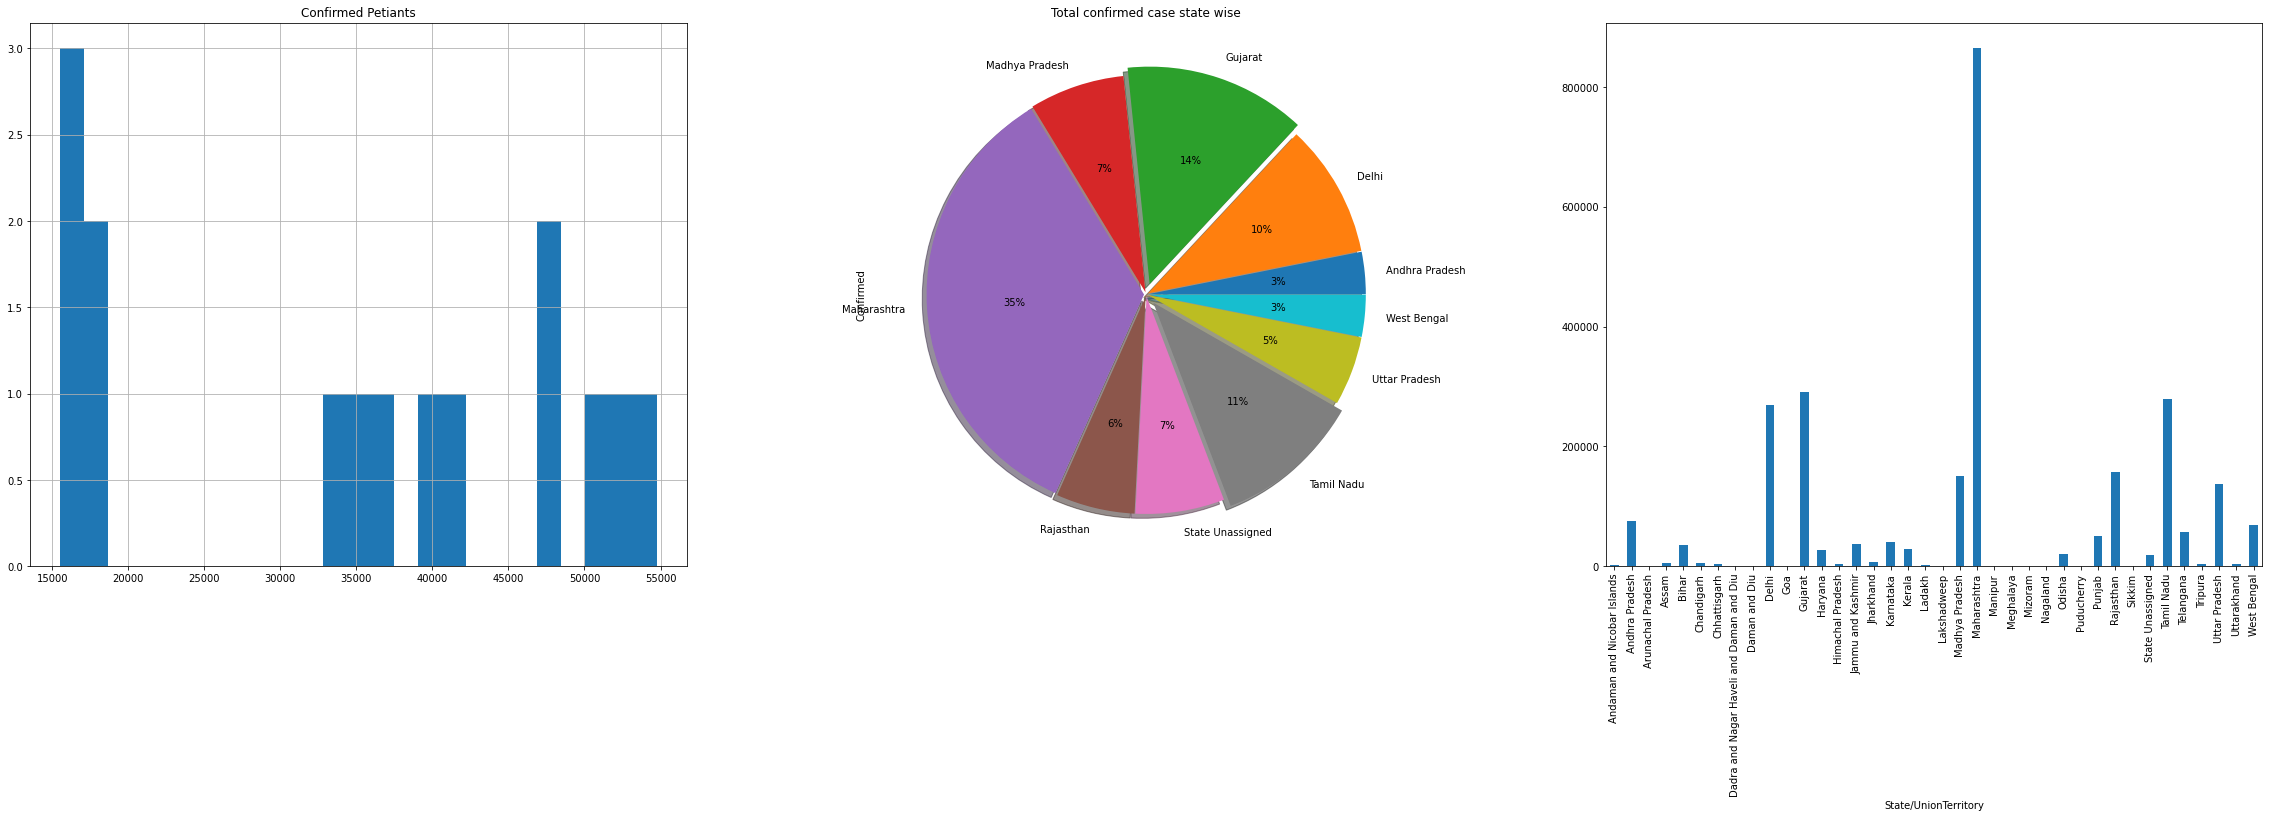

In [38]:
fig = plt.figure(figsize=(40,10))
plt.subplot(1,3,1)
df_cu['Confirmed'].hist(bins=25)
plt.title("Confirmed Petiants")

# For pie chart
plt.subplot(1,3,2)
labels = ['Confirmed']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffdc99','#f5b300']
df_t1.groupby(["State/UnionTerritory"]).sum()["Confirmed"].plot(kind='pie',rot=0,autopct='%1.0f%%',explode=[0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.05,0.01,0.01],shadow=True)
plt.title("Total confirmed case state wise")

plt.subplot(1,3,3)
df.groupby(['State/UnionTerritory']).sum()['Confirmed'].plot(kind='bar',rot=90)

for i in tqdm(range(10)):
  time.sleep(2)


# Violin Plot

<AxesSubplot:ylabel='Cured'>

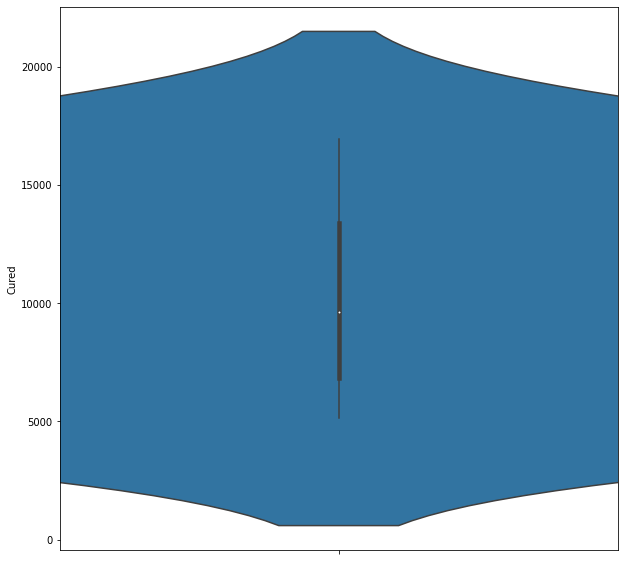

In [39]:
plt.figure(figsize=(10,10))
sns.violinplot(y='Cured',data=df_d,width=5)

<AxesSubplot:ylabel='height'>

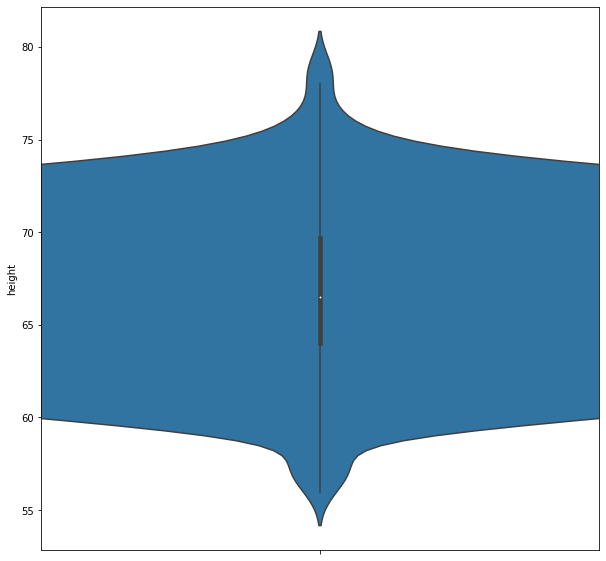

In [40]:
## for Second Dataset

plt.figure(figsize=(10,10))
sns.violinplot(y='height',data=df_2,width=5)

* A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.

* Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

* Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.